![PIC UPV PERTE Chip Chair Logo](https://www.pic-chair.upv.es/wp-content/uploads/2024/05/logo-upv-horizontal.png)
![PIC UPV PERTE Chip Chair Logo](https://www.pic-chair.upv.es/wp-content/uploads/2024/06/logos-perte-chip-1024x119.png)


# Laboratory 1.0. Waveguides

## 0. Imports

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

import tidy3d as td

import gplugins as gp
import gplugins.tidy3d as gt
from gplugins import plot
from gplugins.common.config import PATH

nm = 1e-3
wavelength = np.linspace(1500, 1600) * nm
f = td.C_0 / wavelength

2025-10-16 09:09:08.655 | INFO     | gplugins.tidy3d.modes:_data:266 - load data from .cache/Waveguide_cfb6f00926e7682c.npz.
2025-10-16 09:10:23.156 | INFO     | gplugins.tidy3d.modes:_data:306 - store data into .cache/Waveguide_40d773c408a30909.npz.
2025-10-16 09:11:11.186 | INFO     | gplugins.tidy3d.modes:_data:306 - store data into .cache/Waveguide_8b5cd37528d15f2c.npz.
2025-10-16 09:11:17.065 | INFO     | gplugins.tidy3d.modes:_data:266 - load data from .cache/Waveguide_40d773c408a30909.npz.
2025-10-16 09:11:17.069 | INFO     | gplugins.tidy3d.modes:_data:266 - load data from .cache/Waveguide_8b5cd37528d15f2c.npz.
2025-10-16 09:13:34.493 | INFO     | gplugins.tidy3d.modes:_data:266 - load data from .cache/Waveguide_40d773c408a30909.npz.
2025-10-16 09:13:34.495 | INFO     | gplugins.tidy3d.modes:_data:266 - load data from .cache/Waveguide_8b5cd37528d15f2c.npz.
2025-10-16 09:14:42.701 | INFO     | gplugins.tidy3d.modes:_data:306 - store data into .cache/Waveguide_83aa6d5635db7b36.np

In [3]:
nitride_complex = td.material_library["Si3N4"]["Luke2015PMLStable"].eps_model(f)
nitride_index, nitride_k = td.Medium.eps_complex_to_nk(nitride_complex)
box_complex = td.material_library["SiO2"]["Horiba"].eps_model(f)
box_index, box_k = td.Medium.eps_complex_to_nk(box_complex)

## LO.1. Convergence tests

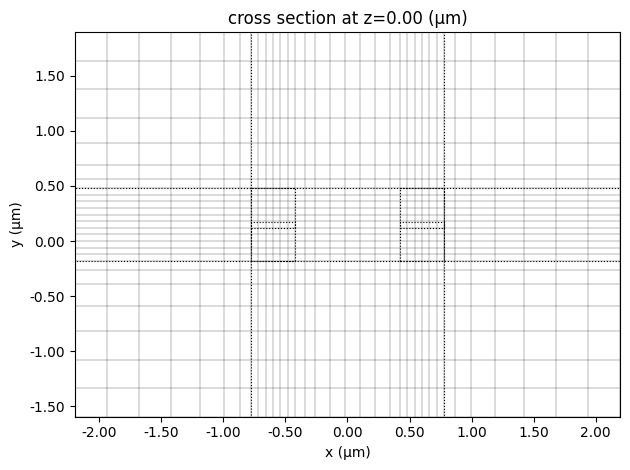

In [4]:
deep_waveguide = gt.modes.Waveguide(
    # Geometrical Parameters
    core_width=1.2, # Waveguide width
    core_thickness=300 * nm, # Waveguide height 
    slab_thickness=0 * nm, # For shallow waveguides - Set to 0 if its a deep-etched waveguide.
    # Materials
    core_material='sin', #  Material of the waveguide
    clad_material='sio2', # Surrounding material
    # Modesolver Parameters
    wavelength=1550 * nm, # Wavelength to simulate
    num_modes=4, # Targeted number of modes to find 
    max_grid_scaling=1.5, # Parameters of the grid
    grid_resolution=6, # STUDENT! Change this parameter between 5 and 150
    cache_path='.cache/', # Important! In order to save simulation time, set your cache Path!
    precision='double',
)

deep_waveguide.plot_grid()

## LO.2. Mode confinement with wavelength

In [45]:
# The wavelength could be a vector also
wavelength = 1550 * nm # Student code here. Tip np.linspace()

deep_waveguide = gt.modes.Waveguide(
    wavelength=wavelength, 
    core_width=1.2, 
    slab_thickness=0.0,
    core_material='sin',
    clad_material='sio2',
    core_thickness=300 * nm,
    num_modes=4,
    cache_path='.cache/',
    precision='double',
    max_grid_scaling=1.2,
    grid_resolution=20, 
)

res_neff = deep_waveguide.n_eff # In this case, the result is not just a number, is a wavelength-dependent vector
res_te = deep_waveguide.fraction_te # Wavelength-dependent vector
res_tm =deep_waveguide.fraction_tm # Wavelength-dependent vector

res_modearea = deep_waveguide.mode_area # STUDENT! This is the mode_area parameter


## LO.3. Group index calculation

  0%|          | 0/2 [00:00<?, ?it/s]

RuntimeError: No mappable was found to use for colorbar creation. First define a mappable such as an image (with imshow) or a contour set (with contourf).

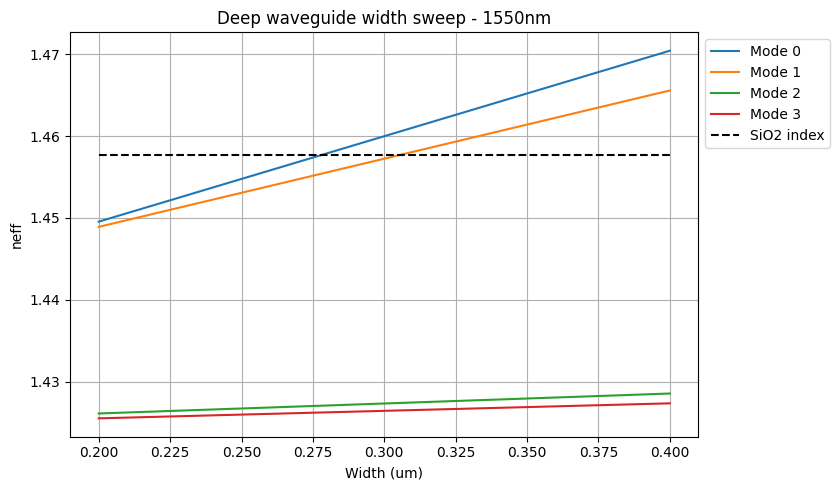

In [44]:
#wavelength = 1550 * nm # Student code here

deep_waveguide = gt.modes.Waveguide(
    wavelength=wavelength,
    core_width=1.2,
    slab_thickness=0.0,
    core_material='sin',
    clad_material='sio2',
    core_thickness=300 * nm,
    num_modes=4,
    cache_path='.cache/',
    precision='double',
    max_grid_scaling=1.2,
    grid_resolution=20, 
)

w = [200 * nm, 400 * nm] # Student code here

sweep_neff = gt.modes.sweep_n_eff(deep_waveguide, 
                             core_width=w)

plt.figure(figsize=(10, 5))
for k in range(sweep_neff.shape[1]):
    plt.plot(w, sweep_neff[:,k].real,label=f'Mode {k}')

plt.title("Deep waveguide width sweep - 1550nm")
plt.xlabel("Width (um)")
plt.ylabel("neff")
plt.grid()
plt.hlines(np.mean(box_index), xmin=np.min(w), xmax=np.max(w), colors='k', linestyles='dashed',label='SiO2 index')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout(rect=[0, 0, 0.85, 1])
plt.colorbar(orientation='horizontal',fraction=0.04).set_label("TE fraction")

## LO.4. Waveguide compact model

In [ ]:
# STUDENT! Put your code here.

## LO.5. Bend waveguide radius vs. loss – deep

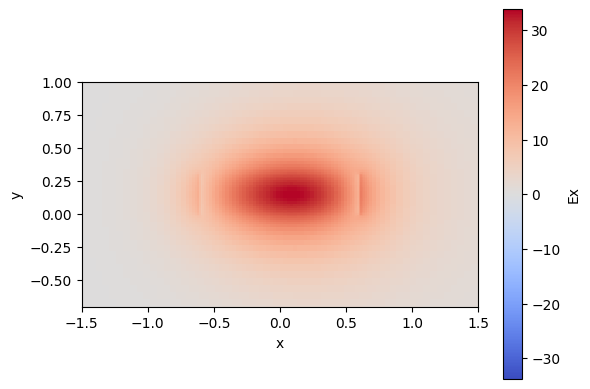

In [35]:
bend_1550 = gt.modes.Waveguide(
    wavelength=1550 * nm,
    core_width=1.2,
    slab_thickness=0.0,
    core_material='sin',
    clad_material='sio2',
    core_thickness=300 * nm,
    num_modes=1,
    cache_path='.cache/',
    precision='double',
    max_grid_scaling=1.2,
    grid_resolution=30, 
    bend_radius=20, # Bend radius
)

bend_1550.plot_field(field_name="Ex", 
                     mode_index=0, # Field to be plotted
                     value='real', # Real - abs - imag
                     cmap='coolwarm',
                     xlim=(-1.5, 1.5), # Set the x and y limits
                     ylim=(-0.7, 1)) 

  0%|          | 0/10 [00:00<?, ?it/s]

Text(0, 0.5, 'Mismatch (dB)')

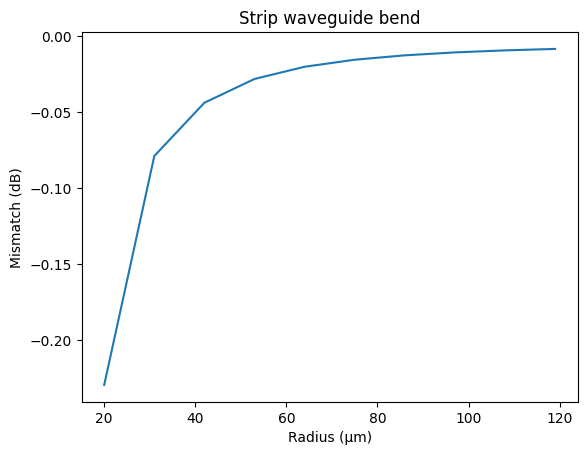

In [36]:
radii = np.arange(20.0, 120,11)

mismatch = gt.modes.sweep_bend_mismatch(bend_1550, radii)

plt.plot(radii, 10 * np.log10(mismatch))
plt.title("Strip waveguide bend")
plt.xlabel("Radius (μm)")
plt.ylabel("Mismatch (dB)")

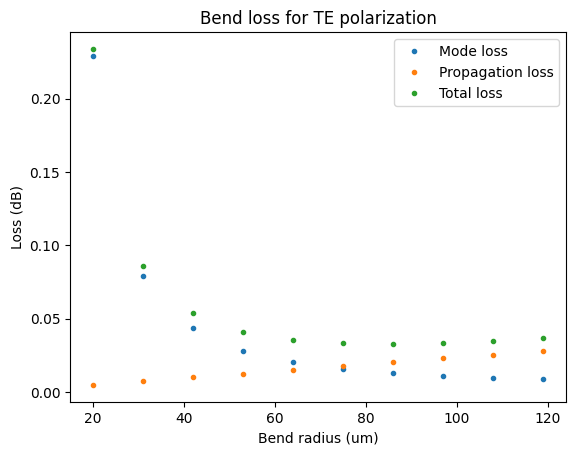

In [37]:
dB_cm = 1.5  # dB/cm Technology loss - 
length = 0.5 * np.pi * radii * 1e-6
propagation_loss = dB_cm * length * 1e2
propagation_loss

plt.title("Bend loss for TE polarization")
plt.plot(radii, -10 * np.log10(mismatch), ".", label="Mode loss")
plt.plot(radii, propagation_loss, ".", label="Propagation loss")
plt.plot(radii, propagation_loss-10 * np.log10(mismatch), ".", label="Total loss")
plt.xlabel("Bend radius (um)")
plt.ylabel("Loss (dB)")
plt.legend()